<a href="https://colab.research.google.com/github/hardik1408/CS771/blob/hardik/emoticon_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## loading the files


In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Load the CSV files
train_df = pd.read_csv('/Users/namangupta/Desktop/771/mini-project-1/datasets/train/train_emoticon.csv')
validation_df = pd.read_csv('/Users/namangupta/Desktop/771/mini-project-1/datasets/valid/valid_emoticon.csv')

# Assuming the CSV files have 'emojis' and 'label' columns
train_texts = train_df['input_emoticon'].values
train_labels = train_df['label'].values

validation_texts = validation_df['input_emoticon'].values
validation_labels = validation_df['label'].values

### Observing data

In [2]:
total_train = []
for i in train_texts:
    total_train += i

emoji_freq = dict()
for i in total_train:
    if i in emoji_freq:
        emoji_freq[i] += 1
    else:
        emoji_freq[i] = 1

In [3]:
emoji_0_1 = dict()

for i in emoji_freq:
    emoji_0_1[i] = (0,0)

for i in emoji_freq:
    for j in range(len(train_texts)):
        if i in train_texts[j]:
            if train_labels[j] == 1:
                emoji_0_1[i] = (emoji_0_1[i][0], emoji_0_1[i][1]+1)
            else:
                emoji_0_1[i] = (emoji_0_1[i][0]+1, emoji_0_1[i][1])

emoji_0_1

mannnyyy = []
for i in emoji_0_1:
    if emoji_0_1[i] == (3576, 3504):
        mannnyyy.append(i)

mannnyyy

['😛', '🛐', '😑', '😣', '🙯', '🚼', '🙼']

We find that in every row these 7 emoticons appear!

In [4]:
ss0 = 0
ss1 = 1
snd = 0

for i in range(len(train_texts)):
    j = train_texts[i]
    for em in mannnyyy:
        if em in j:
            pass
        else:
            snd += 1
            break
    else:
        if train_labels[i] == 0:
            ss0 += 1
        else:
            ss1 += 1
    
ss0, ss1, snd


(3576, 3505, 0)

In [5]:
l1 = []
l0 = []

for i in range(len(train_texts)):
    s = []
    for idx in range(len(train_texts[i])):
        j = train_texts[i][idx]
        if j in mannnyyy:
            s.append((j, idx))

    if train_labels[i] == 1:
        l1.append(len(s))
    else:
        l0.append(len(s))

set(l1), set(l0)

({10}, {10})

Also, these 7 emoticons make up exactly 10/13 of every given string (Be it train or validation)

In [6]:
train_texts_mod = []

for i in train_texts:
    s = ''
    for j in i:
        if j not in mannnyyy:
            s += j
    train_texts_mod.append(s)

train_texts_mod = np.array(train_texts_mod, dtype=object)

In [7]:
validation_texts_mod = []

for i in validation_texts:
    s = ''
    for j in i:
        if j not in mannnyyy:
            s += j
    validation_texts_mod.append(s)

validation_texts_mod = np.array(validation_texts_mod, dtype=object)

We now use 'train_text_mod' and 'validation_text_mod' -> which are just a 3 length string for every element (rather than 13)

## preprocessing on input

In [9]:
#  Tokenize and pad the emoji sequences
tokenizer = Tokenizer(char_level=True)  # Tokenizing each emoji as a character
tokenizer.fit_on_texts(train_texts)  # Fit only on training data

# Convert texts to sequences
train_sequences = tokenizer.texts_to_sequences(train_texts_mod)
validation_sequences = tokenizer.texts_to_sequences(validation_texts_mod)

# Pad the sequences to the same length
max_len = max([len(seq) for seq in train_sequences])  # Maximum sequence length in train data
train_padded = pad_sequences(train_sequences, maxlen=max_len, padding='post')
validation_padded = pad_sequences(validation_sequences, maxlen=max_len, padding='post')

# Convert labels into numeric format if they are not (if necessary)
train_labels = train_labels.astype(int)
validation_labels = validation_labels.astype(int)

## dividing data for the task

In [10]:
x_train_100 = train_padded
y_train_100 = train_labels
# prompt: take only 80% of the training dataset

train_size_80 = int(len(x_train_100) * 0.8)
x_train_80 = x_train_100[:train_size_80]
y_train_80 = y_train_100[:train_size_80]
# prompt: take only 60% of training data

# Shuffle the indices of the training data
indices = np.arange(len(x_train_100))
np.random.shuffle(indices)

# Calculate the number of samples for 60% of the data
train_size_60_random = int(len(x_train_100) * 0.6)

# Select the shuffled indices for the 60% split
x_train_60 = x_train_100[indices[:train_size_60_random]]
y_train_60 = y_train_100[indices[:train_size_60_random]]

indices = np.arange(len(x_train_100))
np.random.shuffle(indices)

# Calculate the number of samples for 60% of the data
train_size_40_random = int(len(x_train_100) * 0.4)

# Select the shuffled indices for the 60% split
x_train_40 = x_train_100[indices[:train_size_40_random]]
y_train_40 = y_train_100[indices[:train_size_40_random]]

indices = np.arange(len(x_train_100))
np.random.shuffle(indices)

# Calculate the number of samples for 60% of the data
train_size_20_random = int(len(x_train_100) * 0.2)

# Select the shuffled indices for the 60% split
x_train_20 = x_train_100[indices[:train_size_20_random]]
y_train_20 = y_train_100[indices[:train_size_20_random]]



### model


In [11]:
%timeit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, BatchNormalization

# Define the improved LSTM model
model = Sequential()

# Embedding layer: increases embedding dimension size for richer representation
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=8, input_length=max_len))

# First LSTM layer: Bidirectional LSTM for capturing dependencies in both directions
model.add(Bidirectional(LSTM(8, return_sequences=True)))  # Return sequences for stacking another LSTM layer
model.add(Dropout(0.2))  # Dropout to prevent overfitting

# Second LSTM layer: another Bidirectional LSTM layer for deeper sequential learning
model.add(Bidirectional(LSTM(16)))
model.add(Dropout(0.2))  # Another dropout layer

# Batch Normalization: helps with stabilizing and accelerating training
model.add(BatchNormalization())

# Dense Layer: fully connected layer
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))  # Dropout for regularization

# Output Layer: Sigmoid for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer and learning rate adjustment
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


### 100%

In [12]:
model.fit(x_train_100, y_train_100, epochs=25, batch_size=32, validation_data=(validation_padded, validation_labels))
# Evaluate the model on the validation data
loss, accuracy = model.evaluate(validation_padded, validation_labels)

accuracy_100perc = accuracy

# Print the final accuracy
print(f'Validation Accuracy: {accuracy:.4f}')

Epoch 1/25
222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5103 - loss: 0.6931 - val_accuracy: 0.7362 - val_loss: 0.6658
Epoch 2/25
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8159 - loss: 0.4296 - val_accuracy: 0.9100 - val_loss: 0.3536
Epoch 3/25
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8810 - loss: 0.2946 - val_accuracy: 0.9202 - val_loss: 0.1957
Epoch 4/25
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8873 - loss: 0.2590 - val_accuracy: 0.9223 - val_loss: 0.1882
Epoch 5/25
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9067 - loss: 0.2268 - val_accuracy: 0.9284 - val_loss: 0.1649
Epoch 6/25
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9088 - loss: 0.2155 - val_accuracy: 0.8957 - val_loss: 0.2169
Epoch 7/25
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9142 - loss: 0.2038 - val_accuracy: 0.9468 - val_loss: 0.1203
Epoch 8/25
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9204 - loss: 0.1840 - val_accuracy: 0.

In [13]:
# Print the model summary for reference
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 3, 8)           │         1,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 3, 16)          │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 32)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,173 (86.62 KB)

 Trainable params: 7,369 (28.79 KB)

 Non-trainable params: 64 (256.00 B)

 Optimizer params: 14,740 (57.58 KB)

### 80%

In [14]:
%timeit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, BatchNormalization

# Define the improved LSTM model
model = Sequential()

# Embedding layer: increases embedding dimension size for richer representation
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=8, input_length=max_len))

# First LSTM layer: Bidirectional LSTM for capturing dependencies in both directions
model.add(Bidirectional(LSTM(8, return_sequences=True)))  # Return sequences for stacking another LSTM layer
model.add(Dropout(0.2))  # Dropout to prevent overfitting

# Second LSTM layer: another Bidirectional LSTM layer for deeper sequential learning
model.add(Bidirectional(LSTM(16)))
model.add(Dropout(0.2))  # Another dropout layer

# Batch Normalization: helps with stabilizing and accelerating training
model.add(BatchNormalization())

# Dense Layer: fully connected layer
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))  # Dropout for regularization

# Output Layer: Sigmoid for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer and learning rate adjustment
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(x_train_80, y_train_80, epochs=25, batch_size=32, validation_data=(validation_padded, validation_labels))
# Evaluate the model on the validation data
loss, accuracy = model.evaluate(validation_padded, validation_labels)

accuracy_80perc = accuracy

# Print the final accuracy
print(f'Validation Accuracy: {accuracy:.4f}')

Epoch 1/25
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5089 - loss: 0.6932 - val_accuracy: 0.4847 - val_loss: 0.6848
Epoch 2/25
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7840 - loss: 0.5113 - val_accuracy: 0.7853 - val_loss: 0.4950
Epoch 3/25
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8660 - loss: 0.3171 - val_accuracy: 0.8650 - val_loss: 0.3003
Epoch 4/25
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8838 - loss: 0.2808 - val_accuracy: 0.9080 - val_loss: 0.2075
Epoch 5/25
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8869 - loss: 0.2772 - val_accuracy: 0.9100 - val_loss: 0.1679
Epoch 6/25
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9036 - loss: 0.2331 - val_accuracy: 0.9162 - val_loss: 0.1783
Epoch 7/25
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9132 - loss: 0.2138 - val_accuracy: 0.9448 - val_loss: 0.1318
Epoch 8/25
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9151 - loss: 0.2116 - val_accuracy: 0.

### 60%

In [16]:
%timeit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, BatchNormalization

# Define the improved LSTM model
model = Sequential()

# Embedding layer: increases embedding dimension size for richer representation
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=8, input_length=max_len))

# First LSTM layer: Bidirectional LSTM for capturing dependencies in both directions
model.add(Bidirectional(LSTM(8, return_sequences=True)))  # Return sequences for stacking another LSTM layer
model.add(Dropout(0.2))  # Dropout to prevent overfitting

# Second LSTM layer: another Bidirectional LSTM layer for deeper sequential learning
model.add(Bidirectional(LSTM(16)))
model.add(Dropout(0.2))  # Another dropout layer

# Batch Normalization: helps with stabilizing and accelerating training
model.add(BatchNormalization())

# Dense Layer: fully connected layer
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))  # Dropout for regularization

# Output Layer: Sigmoid for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer and learning rate adjustment
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
model.fit(x_train_60, y_train_60, epochs=25, batch_size=32, validation_data=(validation_padded, validation_labels))
# Evaluate the model on the validation data
loss, accuracy = model.evaluate(validation_padded, validation_labels)

accuracy_60perc = accuracy

# Print the final accuracy
print(f'Validation Accuracy: {accuracy:.4f}')

Epoch 1/25
133/133 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5081 - loss: 0.6934 - val_accuracy: 0.5153 - val_loss: 0.6903
Epoch 2/25
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7382 - loss: 0.5474 - val_accuracy: 0.8344 - val_loss: 0.5156
Epoch 3/25
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8821 - loss: 0.3032 - val_accuracy: 0.8793 - val_loss: 0.3536
Epoch 4/25
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8987 - loss: 0.2508 - val_accuracy: 0.9080 - val_loss: 0.2387
Epoch 5/25
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9032 - loss: 0.2395 - val_accuracy: 0.9059 - val_loss: 0.2079
Epoch 6/25
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9133 - loss: 0.2173 - val_accuracy: 0.9100 - val_loss: 0.1867
Epoch 7/25
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9068 - loss: 0.2187 - val_accuracy: 0.9182 - val_loss: 0.1674
Epoch 8/25
133/133 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9143 - loss: 0.2259 - val_accuracy: 0.

### 40%

In [18]:
%timeit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, BatchNormalization

# Define the improved LSTM model
model = Sequential()

# Embedding layer: increases embedding dimension size for richer representation
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=8, input_length=max_len))

# First LSTM layer: Bidirectional LSTM for capturing dependencies in both directions
model.add(Bidirectional(LSTM(8, return_sequences=True)))  # Return sequences for stacking another LSTM layer
model.add(Dropout(0.2))  # Dropout to prevent overfitting

# Second LSTM layer: another Bidirectional LSTM layer for deeper sequential learning
model.add(Bidirectional(LSTM(16)))
model.add(Dropout(0.2))  # Another dropout layer

# Batch Normalization: helps with stabilizing and accelerating training
model.add(BatchNormalization())

# Dense Layer: fully connected layer
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))  # Dropout for regularization

# Output Layer: Sigmoid for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer and learning rate adjustment
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
model.fit(x_train_40, y_train_40, epochs=25, batch_size=32, validation_data=(validation_padded, validation_labels))
# Evaluate the model on the validation data
loss, accuracy = model.evaluate(validation_padded, validation_labels)


accuracy_40perc = accuracy

# Print the final accuracy
print(f'Validation Accuracy: {accuracy:.4f}')

Epoch 1/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4973 - loss: 0.6932 - val_accuracy: 0.4847 - val_loss: 0.6945
Epoch 2/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5067 - loss: 0.6937 - val_accuracy: 0.4847 - val_loss: 0.6932
Epoch 3/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6431 - loss: 0.6543 - val_accuracy: 0.7873 - val_loss: 0.6206
Epoch 4/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8093 - loss: 0.4318 - val_accuracy: 0.8446 - val_loss: 0.5100
Epoch 5/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8626 - loss: 0.3380 - val_accuracy: 0.8671 - val_loss: 0.3977
Epoch 6/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8624 - loss: 0.3357 - val_accuracy: 0.8834 - val_loss: 0.3129
Epoch 7/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8947 - loss: 0.2744 - val_accuracy: 0.8446 - val_loss: 0.2993
Epoch 8/25
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9039 - loss: 0.2623 - val_accuracy: 0.9059 - val_loss:

### 20%

In [20]:
%timeit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, BatchNormalization

# Define the improved LSTM model
model = Sequential()

# Embedding layer: increases embedding dimension size for richer representation
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=8, input_length=max_len))

# First LSTM layer: Bidirectional LSTM for capturing dependencies in both directions
model.add(Bidirectional(LSTM(8, return_sequences=True)))  # Return sequences for stacking another LSTM layer
model.add(Dropout(0.2))  # Dropout to prevent overfitting

# Second LSTM layer: another Bidirectional LSTM layer for deeper sequential learning
model.add(Bidirectional(LSTM(16)))
model.add(Dropout(0.2))  # Another dropout layer

# Batch Normalization: helps with stabilizing and accelerating training
model.add(BatchNormalization())

# Dense Layer: fully connected layer
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))  # Dropout for regularization

# Output Layer: Sigmoid for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer and learning rate adjustment
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
model.fit(x_train_20, y_train_20, epochs=25, batch_size=32, validation_data=(validation_padded, validation_labels))
# Evaluate the model on the validation data
loss, accuracy = model.evaluate(validation_padded, validation_labels)


accuracy_20perc = accuracy

# Print the final accuracy
print(f'Validation Accuracy: {accuracy:.4f}')

Epoch 1/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5346 - loss: 0.6923 - val_accuracy: 0.5153 - val_loss: 0.6926
Epoch 2/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5863 - loss: 0.6823 - val_accuracy: 0.5460 - val_loss: 0.6904
Epoch 3/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6938 - loss: 0.6304 - val_accuracy: 0.6605 - val_loss: 0.6716
Epoch 4/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8275 - loss: 0.4510 - val_accuracy: 0.7751 - val_loss: 0.6100
Epoch 5/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8729 - loss: 0.3198 - val_accuracy: 0.8016 - val_loss: 0.5465
Epoch 6/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8789 - loss: 0.3093 - val_accuracy: 0.8323 - val_loss: 0.5016
Epoch 7/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9159 - loss: 0.2562 - val_accuracy: 0.8303 - val_loss: 0.4610
Epoch 8/25
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9100 - loss: 0.2497 - val_accuracy: 0.8405 - val_loss:

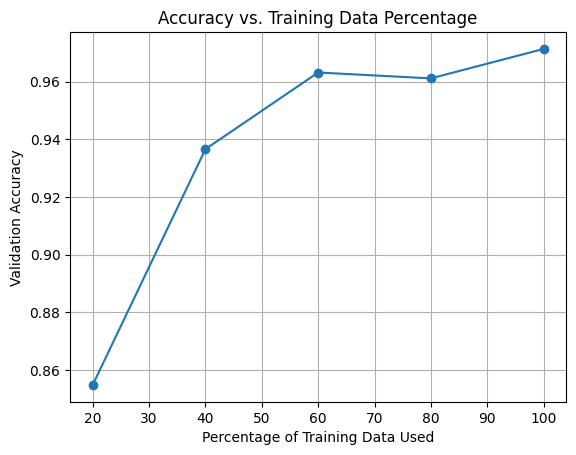

In [22]:
import matplotlib.pyplot as plt

# Assuming you have the accuracy values for each training data percentage stored in a list
training_data_percentages = [20, 40, 60, 80, 100]
accuracies = [accuracy_20perc, accuracy_40perc, accuracy_60perc, accuracy_80perc, accuracy_100perc]  # Replace with your actual accuracy values


# Create the plot
plt.plot(training_data_percentages, accuracies, marker='o')
plt.xlabel('Percentage of Training Data Used')
plt.ylabel('Validation Accuracy')
plt.title('Accuracy vs. Training Data Percentage')
plt.grid(True)
plt.show()


In [23]:
# Define the LSTM model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=8, input_length=max_len))  # Embedding layer
model.add(LSTM(16))  # LSTM layer with 16 units
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [24]:
# Train the model using the training data and validate on the validation set
model.fit(train_padded, train_labels, epochs=30, validation_data=(validation_padded, validation_labels))
# Evaluate the model on the validation data
loss, accuracy = model.evaluate(validation_padded, validation_labels)
print(f'Validation Accuracy: {accuracy}')


Epoch 1/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5613 - loss: 0.6840 - val_accuracy: 0.8773 - val_loss: 0.4230
Epoch 2/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - accuracy: 0.9064 - loss: 0.3156 - val_accuracy: 0.9468 - val_loss: 0.1590
Epoch 3/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - accuracy: 0.9571 - loss: 0.1445 - val_accuracy: 0.9571 - val_loss: 0.1198
Epoch 4/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - accuracy: 0.9681 - loss: 0.1026 - val_accuracy: 0.9652 - val_loss: 0.0967
Epoch 5/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - accuracy: 0.9769 - loss: 0.0836 - val_accuracy: 0.9652 - val_loss: 0.0845
Epoch 6/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - accuracy: 0.9797 - loss: 0.0707 - val_accuracy: 0.9755 - val_loss: 0.0723
Epoch 7/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - accuracy: 0.9812 - loss: 0.0627 - val_accuracy: 0.9775 - val_loss: 0.0660
Epoch 8/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - accuracy: 0.9840 - loss: 0.0550 - va

In [25]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, 3, 8)           │         1,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 16)             │         1,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,013 (39.12 KB)

 Trainable params: 3,337 (13.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,676 (26.08 KB)

In [26]:
%timeit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, BatchNormalization

# Define the improved LSTM model
model = Sequential()

# Embedding layer: increases embedding dimension size for richer representation
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=8, input_length=max_len))

# First LSTM layer: Bidirectional LSTM for capturing dependencies in both directions
model.add(Bidirectional(LSTM(8, return_sequences=True)))  # Return sequences for stacking another LSTM layer
model.add(Dropout(0.2))  # Dropout to prevent overfitting

# Second LSTM layer: another Bidirectional LSTM layer for deeper sequential learning
model.add(Bidirectional(LSTM(16)))
model.add(Dropout(0.2))  # Another dropout layer

# Batch Normalization: helps with stabilizing and accelerating training
model.add(BatchNormalization())

# Dense Layer: fully connected layer
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))  # Dropout for regularization

# Output Layer: Sigmoid for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model with Adam optimizer and learning rate adjustment
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:

# Train the model using the train set and validate on the validation set
model.fit(train_padded, train_labels, epochs=25, batch_size=16, validation_data=(validation_padded, validation_labels))

Epoch 1/25
443/443 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5922 - loss: 0.6399 - val_accuracy: 0.8937 - val_loss: 0.3960
Epoch 2/25
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8494 - loss: 0.3335 - val_accuracy: 0.9202 - val_loss: 0.2024
Epoch 3/25
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8749 - loss: 0.2862 - val_accuracy: 0.9387 - val_loss: 0.1517
Epoch 4/25
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8870 - loss: 0.2572 - val_accuracy: 0.9366 - val_loss: 0.1494
Epoch 5/25
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8994 - loss: 0.2447 - val_accuracy: 0.9530 - val_loss: 0.1533
Epoch 6/25
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8989 - loss: 0.2299 - val_accuracy: 0.9632 - val_loss: 0.1308
Epoch 7/25
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9066 - loss: 0.2157 - val_accuracy: 0.9387 - val_loss: 0.1374
Epoch 8/25
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8977 - loss: 0.2435 - val_accuracy: 0.

In [28]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ (None, 3, 8)           │         1,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_10                │ (None, 3, 16)          │         1,088 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 3, 16)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_11                │ (None, 32)             │         4,224 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,173 (86.62 KB)

 Trainable params: 7,369 (28.79 KB)

 Non-trainable params: 64 (256.00 B)

 Optimizer params: 14,740 (57.58 KB)

In [29]:
# Evaluate the model on the validation data
loss, accuracy = model.evaluate(validation_padded, validation_labels)

# Print the final accuracy
print(f'Validation Accuracy: {accuracy:.4f}')


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 559us/step - accuracy: 0.9768 - loss: 0.0552
Validation Accuracy: 0.9755


In [30]:
model.save('./models/dataset1.keras')